In [1]:
import nltk
import random
import pandas as pd
import numpy as np


In [2]:
from nltk.corpus import names


Male_Names = names.words('male.txt')
Female_Names = names.words('female.txt')


print('Sample Male Names:-   ',Male_Names[0:5])
print('Sample Female Names:- ',Female_Names[0:5])

Sample Male Names:-    ['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot']
Sample Female Names:-  ['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi']


In [3]:
Name_List = [(Name , 'male') for Name in Male_Names] + [(Name , 'female') for Name in Female_Names]


print(Name_List[:5],'\n')
print(Name_List[-5:])

random.shuffle(Name_List)


print('\n #### Suffled names:-')
Name_List[-5:]

[('Aamir', 'male'), ('Aaron', 'male'), ('Abbey', 'male'), ('Abbie', 'male'), ('Abbot', 'male')] 

[('Zorine', 'female'), ('Zsa Zsa', 'female'), ('Zsazsa', 'female'), ('Zulema', 'female'), ('Zuzana', 'female')]

 #### Suffled names:-


[('Constancia', 'female'),
 ('Dennie', 'female'),
 ('Lidia', 'female'),
 ('Donald', 'male'),
 ('Abelard', 'male')]

In [4]:
def Name_Feature (name):
    return {
        'last_char': name[-1],
        'last_two_char': name[-2:],
        'last_three_char': name[-3:],
        'first_char': name[0],
        'first_two_char': name[:2],
        'first_three_char': name[:3]
    }

features = [ (Name_Feature(name= NAME), Gender) for (NAME, Gender) in Name_List ]
features[:1]

[({'last_char': 'o',
   'last_two_char': 'io',
   'last_three_char': 'cio',
   'first_char': 'P',
   'first_two_char': 'Pa',
   'first_three_char': 'Pat'},
  'male')]

In [5]:
Training_Set = features[ :round(len(features) * .7)]
Testing_Set = features[round(len(features) * .7): ]

print(len(Training_Set))
print(len(Testing_Set))

5561
2383


In [6]:
classifier = nltk.NaiveBayesClassifier.train(Training_Set)

In [7]:
round(nltk.classify.accuracy(classifier , Testing_Set) * 100, 2)

82.54

In [8]:
Final_Classifier_Model = nltk.NaiveBayesClassifier.train(features)

In [9]:
import pickle
import os

with open('Final_Classifier_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_Classifier_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: c:\Users\harleyquinn\Documents\GitHub\Bollywood_movie_analysis\final\text


In [10]:
def Identify_Person_Gender(Text):
    import re
    import pandas as pd
    import nltk
    from nltk.tokenize import word_tokenize, sent_tokenize

    import pickle
    with open('Final_Classifier_Model.pkl', 'rb') as fileReadStream:
        Prediction_Model=pickle.load(fileReadStream)
        fileReadStream.close() 
        
    Final_Name= []
    Final_Gender= []

    Sent_List = sent_tokenize(Text.title())

    for sent in Sent_List:
        word_list = word_tokenize(sent)

        pos_tags = nltk.pos_tag(word_list)

        Person_Name= [name[0] for name in pos_tags if name[1] in ['NNP','NN']]
        Person_Name= re.sub(r'[^a-z A-Z . ,]',r'',str(Person_Name))

        Person_Name_feature= {  'last_char': Person_Name[-1],
                                'last_two_char': Person_Name[-2:],
                                'last_three_char': Person_Name[-3:],
                                'first_char': Person_Name[0],
                                'first_two_char': Person_Name[:2],
                                'first_three_char': Person_Name[:3] 
                             }

        Gender_Prediction=Prediction_Model.classify(Person_Name_feature)
        
        Final_Name.append(Person_Name)
        Final_Gender.append(Gender_Prediction)        
    
    prediction_result= pd.DataFrame({'Name':Final_Name, 'Gender': Final_Gender})

    return(prediction_result)
    

In [11]:
text = """Arun Neelakandan, a teenager from Kerala, joins KC Tech, a popular engineering college in Chennai for his graduation. He falls in love with college sweetheart Darshana at the first sight. They grow closer after Arun is ragged by his seniors, but a few scuffles and incidents get the seniors suspended and they start dating. Arun accompanies his friend Antony to meet his online girlfriend, and feels attracted to her colleague. He lies to her, states he is single and they lean in for a kiss but they are interrupted by moral police. A guilt-ridden Arun confesses to Darshana, who lividly calls off the relationship. In the heat of their argument, they challenge each other that they will have other romantic partners better than each other.

Arun's life goes downhill after the breakup. He takes to ragging juniors and thrashing up other people and outsiders in his second year and is addicted to alcohol. He begins a relationship with Maya but doesn't find himself happy. Meanwhile, Darshana starts dating Kedar, a womanizer. He warns Darshana but she ignores it as a sign of jealousy. However, Arun is proven right and Darshana slaps Kedar. Kedar threatens to spread rumours about her, and her friend convey this to and Arun beats Kedar up and silences him. At home, Arun's parents notice something is wrong with their son. His father advices him to quit alcohol and turn over a new leaf in his life.

Arun moves out of his shared hostel room to a more peaceful atmosphere. He joins their classmate Selva's coaching classes along with Antony and they soon rebound in academics, with Arun being fifth in class, and both clearing many of their supplies. Later, Darshana too joins Selva's coaching class and finds herself liking the newly changed Arun. Selva dies in a bus accident and everyone in his class is grief-stricken. Maya calls off her relationship with Arun after her father's death, realizing that Arun does not love her but only wanted her to make Darshana jealous. On the last day of college, all students are led into a room called "the secret alley," (which was shown in their first year and they learned that only the final year students can see what it is on their final day) where they leave a message for the next batch of students. However, Arun finds himself unable to write anything. Darshana, who accompanies Arun to his train, asks him if they would have still been together if not for the argument four years ago. He does not have an answer.

After graduation, Arun gets a job in a campus interview. Two years later, Arun feels dissatisfied with his job and leaves it. Darshana, now a YouTube vlogger, advises him to pursue his dreams. On a bus journey, he meets Jimmy, a wedding photographer who is in need of a partner, drags him to photography. Arun decides that they should be a company that specialises in intimate weddings since no such brand currently exists in Kerala. He gets their company a shoutout from Prateek Tiwari, his batchmate at KC Tech who, is now a popular Bollywood singer. After the shoutout, they get lots of bookings and enquiries and they become famous and Arun now feels satisfied with what he is doing.

During one of such weddings, Arun sees Nithya Balagopal and feels instantly attracted to her. Impressed with his photographs, Nithya recommends Arun to her cousin, who is about to be married. However, Arun discovers that the groom is Kedar and exposes his character to Nithya. The wedding is called off and Nithya is grateful to Arun for saving her cousin's life. They grow closer and Nithya accompanies Arun to Chennai, for a wedding and back to the terrace where Selva held his coaching classes, but unfortunately now locked up after arrival of new tenants.

With their parents' approval, Nithya and Arun fix their marriage. Darshana attends the wedding reception but finds herself unable to come to terms with the fact Arun can no longer be hers and leaves in tears. Arun and Nithya get married and live happily thereafter. Three years later, Nithya gives birth to a baby boy. A joyous Arun feels like telling Darshana the news first.

Darshana's marriage is fixed, and Arun and Nitya along with their son go to her place for the same, but Darshana, who still has feelings for Arun, acts too close around him, which irks Nithya. That night, she calls her to meet at the same place they confessed to each other, the beach. Arun tries to secretly leave but Nithya wakes up and he lies to her saying that they have a bachelorette party for her and leaves. But Arun feels guilty and goes to the room to find Nithya in a sad state realising that he lied. He confesses that he is going to meet Darshana. She allows him and she goes back to sleep peacefully. Darshana, who is due to get married the next day, expresses her reservations about marriage to Arun, and asks him once again if they would have still been together were it not for the argument. Arun tells her to stop thinking about the what-ifs and look forward to her future and they tearfully embrace. Darshana gets married.

While in Chennai, Arun takes a detour to KC Tech and gets the key to the secret alley. He writes a thank you note to the college for making him who he is and exits the campus, where he, Nithya and their son return home."""

In [12]:
tab= Identify_Person_Gender(text)
tab

,Name,Gender
0,"Arun, Neelakandan, A, Teenager, From, Kerala, ...",male
1,"Love, College, Sweetheart, Darshana, First, Sight",male
2,"Arun, Is, A, Few, Scuffles, Incidents, Seniors...",male
3,"Arun, Friend, Antony, Online, Girlfriend, Feel...",male
4,"Her, States, Single, A, Kiss, Moral, Police",male
5,"Arun, Darshana, Who, Lividly, Calls, Relationship",male
6,"Heat, Their, Argument, Than",male
7,"Arun, Life, Goes, Downhill, Breakup",male
8,"Year, Is, Addicted, Alcohol",female
9,"Relationship, Maya, DoesnT, Find, Himself, Happy",male


In [13]:
import spacy
nlp = spacy.load('en_core_web_sm')

c:\Users\harleyquinn\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
doc = nlp(text)
d=[]
for ent in doc.ents:
    
    d.append(ent.text)
print(d)

['Arun Neelakandan', 'Kerala', 'KC Tech', 'Darshana', 'first', 'Antony', 'Darshana', 'his second year', 'Maya', 'Darshana', 'Kedar', 'Darshana', 'Arun', 'Darshana slaps Kedar', 'Kedar', 'Kedar', 'Selva', 'Antony', 'fifth', 'Darshana', 'Selva', 'Maya', 'Darshana', 'the last day', 'the secret alley', 'their first year', 'only the final year', 'their final day', 'Darshana', 'Arun', 'four years ago', 'Two years later', 'Arun', 'Darshana', 'YouTube', 'Jimmy', 'Kerala', 'Prateek Tiwari', 'Bollywood', 'one', 'Arun', 'Nithya Balagopal', 'Arun', 'Kedar', 'Selva', 'Darshana', 'Three years later', 'Darshana', 'first', 'Darshana', 'Arun', 'Nitya', 'Darshana', 'Nithya', 'That night', 'Arun', 'Darshana', 'Darshana', 'the next day', 'Darshana', 'Arun']


In [15]:
fdf = tab[tab['Gender'] == 'female' ]
fdf

,Name,Gender
8,"Year, Is, Addicted, Alcohol",female
11,"Darshana, A, Sign, Jealousy",female
16,"Arun, Out, Shared, Hostel, Room, A, More, Peac...",female
29,"Arun, Company, Intimate, Weddings, No, Such, B...",female
34,"Arun, Discovers, Groom, Is, Kedar, Exposes, Ch...",female
42,"Darshana, Marriage, Arun, Nitya, Along, Their,...",female
46,"Meet, Darshana",female
51,"Chennai, Arun, Takes, A, Detour, Kc, Tech, Key...",female


In [16]:
mdf = tab[tab['Gender']== 'male']
mdf

,Name,Gender
0,"Arun, Neelakandan, A, Teenager, From, Kerala, ...",male
1,"Love, College, Sweetheart, Darshana, First, Sight",male
2,"Arun, Is, A, Few, Scuffles, Incidents, Seniors...",male
3,"Arun, Friend, Antony, Online, Girlfriend, Feel...",male
4,"Her, States, Single, A, Kiss, Moral, Police",male
5,"Arun, Darshana, Who, Lividly, Calls, Relationship",male
6,"Heat, Their, Argument, Than",male
7,"Arun, Life, Goes, Downhill, Breakup",male
9,"Relationship, Maya, DoesnT, Find, Himself, Happy",male
10,"Darshana, Starts, Dating, Kedar, A, Womanizer",male


In [17]:
import datacompy

In [18]:
compare = datacompy.Compare(mdf,fdf,join_columns='Gender')

c:\Users\harleyquinn\AppData\Local\Programs\Python\Python310\lib\site-packages\datacompy\core.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df1[order_column] = generate_id_within_group(
c:\Users\harleyquinn\AppData\Local\Programs\Python\Python310\lib\site-packages\datacompy\core.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df2[order_column] = generate_id_within_group(
c:\Users\harleyquinn\AppData\Local\Programs\Python\Python310\lib\site-packages\datacompy\core.py:289: SettingWithC

In [19]:
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0       df1        2    45
1       df2        2     8

Column Summary
--------------

Number of columns in common: 2
Number of columns in df1 but not in df2: 0
Number of columns in df2 but not in df1: 0

Row Summary
-----------

Matched on: gender
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 0
Number of rows in df1 but not in df2: 45
Number of rows in df2 but not in df1: 8

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 2
Total number of values which compare unequal: 0

Sample Rows Only in df1 (First 10 Columns)
------------------------------------------

                                                                       

In [20]:
Gcount = tab.groupby('Gender').size().reset_index(name='counts')

In [21]:
Gcount

,Gender,counts
0,female,8
1,male,45


In [22]:
Gcount["Gender"].max()

'male'

In [23]:
Gcount.to_csv("count.csv")

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

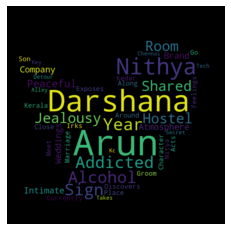

In [25]:
w3 = " ".join(title for title in fdf.name)
img = np.array(Image.open("C:\\Users\\harleyquinn\\Documents\\GitHub\\Bollywood_movie_analysis\\image.png"))
wc = WordCloud(collocations = False, background_color ='black',mask=img).generate(w3)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
import pandas as pd
from matplotlib import pyplot as plt

In [27]:
data = pd.read_csv(r"count.csv")
data.head()

,Unnamed: 0,Gender,counts
0,0,female,8
1,1,male,45


In [28]:
df = pd.DataFrame(data)
Gender= df['Gender']
Count = df['counts']

Text(0, 0.5, 'Count')

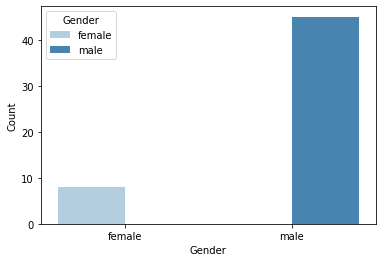

In [29]:
sns.barplot(data=df, x="Gender", y="counts", hue="Gender",palette = "Blues")
plt.xlabel("Gender")
plt.ylabel("Count")

In [31]:
X = tab.drop('Gender', axis=1)
X.head()

,Name
0,"Arun, Neelakandan, A, Teenager, From, Kerala, ..."
1,"Love, College, Sweetheart, Darshana, First, Sight"
2,"Arun, Is, A, Few, Scuffles, Incidents, Seniors..."
3,"Arun, Friend, Antony, Online, Girlfriend, Feel..."
4,"Her, States, Single, A, Kiss, Moral, Police"


In [32]:
X.columns

Index(['Name'], dtype='object')

In [33]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [34]:
v = DictVectorizer(sparse=False)
X = v.fit_transform(X.to_dict('records'))
X.shape

(53, 53)

In [35]:
y = tab.Gender.values

In [36]:
classes = np.unique(y)

In [37]:
classes = classes.tolist()
classes

['female', 'male']

In [38]:
X.shape, y.shape

((53, 53), (53,))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

In [40]:
X_train.shape, y_train.shape

((35, 53), (35,))

In [42]:
new_classes = classes.copy()
new_classes.pop()
new_classes

['female']

In [43]:
per = Perceptron(verbose=10, n_jobs=-1, max_iter=5)
per.partial_fit(X_train, y_train, classes)

-- Epoch 1
Norm: 3.61, NNZs: 13, Bias: 1.000000, T: 35, Avg. loss: 0.171429
Total training time: 0.00 seconds.


Perceptron(max_iter=5, n_jobs=-1, verbose=10)

In [44]:
print(classification_report(y_pred=per.predict(X_test), y_true=y_test, labels=new_classes))

              precision    recall  f1-score   support

      female       0.00      0.00      0.00         2

   micro avg       0.00      0.00      0.00         2
   macro avg       0.00      0.00      0.00         2
weighted avg       0.00      0.00      0.00         2



c:\Users\harleyquinn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harleyquinn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harleyquinn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif